# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import countplot
from matplotlib.pyplot import figure, show
from scipy import stats
import warnings
import gc
warnings.filterwarnings('ignore')

#warnings.filterwarnings('default')

# Load Data

In [3]:
df = pd.read_csv('/Volumes/C/Thesis-2019/cluster-output/DG_out.csv',dtype={0:'object',1:'int64',2:'int64',3:'float64',4:'float64',5:'float64',6:'float64',7:'float64',8:'int64',9:'int64',10:'int64',11:'int64',12:'int64'})

# EDA

In [4]:
df.head()

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...,0,1,0.0,50.0,50.0,0.0,50.0,0,0,0,0,0
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,1,2,50.0,50.0,100.0,50.0,25.0,0,0,0,0,0
2,ea44e97271691990157559d0bdd9959e02790c34db6c00...,1,1,10.0,10.0,20.0,10.0,10.0,0,0,0,0,0
3,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,1,1,40.0,30.0,70.0,40.0,30.0,0,0,0,0,0
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,1,2,30.0,30.0,60.0,30.0,15.0,0,0,0,0,0


In [5]:
df.shape

(30248134, 13)

In [6]:
pd.options.display.float_format = '{:.3f}'.format

o_df = pd.DataFrame()
o_df['indegree'] = df['indegree']
o_df['outdegree'] = df['outdegree']
o_df['in_btc'] = np.log(df['in_btc']).replace(-np.inf, 0)
o_df['out_btc']= np.log(df['out_btc']).replace(-np.inf, 0)
o_df['total_btc']= np.log(df['total_btc']).replace(-np.inf, 0)
o_df['mean_in_btc']= np.log(df['mean_in_btc']).replace(-np.inf, 0)
o_df['mean_out_btc']= np.log(df['mean_out_btc']).replace(-np.inf, 0)
o_df['tx_hash'] = df['tx_hash']
o_df['in_malicious'] = df['in_malicious']
o_df['out_malicious'] = df['out_malicious']
o_df['is_malicious'] = df['is_malicious']
o_df['out_and_tx_malicious'] = df['out_and_tx_malicious']
o_df['all_malicious'] = df['all_malicious']

o_df.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
count,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000
mean,2.149,2.149,-0.031,-0.035,0.670,-0.422,-0.676,0.000,0.000,0.000,0.000,0.000
std,7.421,4.512,2.831,2.884,2.858,2.895,2.871,0.006,0.001,0.001,0.002,0.007
min,0.000,0.000,-18.421,-18.421,-18.421,-18.421,-18.421,0.000,0.000,0.000,0.000,0.000
25%,1.000,2.000,-2.249,-2.283,-1.581,-2.649,-2.918,0.000,0.000,0.000,0.000,0.000
50%,1.000,2.000,-0.003,-0.005,0.675,-0.536,-0.694,0.000,0.000,0.000,0.000,0.000
75%,2.000,2.000,2.151,2.204,2.912,1.725,1.508,0.000,0.000,0.000,0.000,0.000
max,1932.000,1322.000,13.218,13.122,13.864,13.121,13.122,1.000,1.000,1.000,1.000,1.000


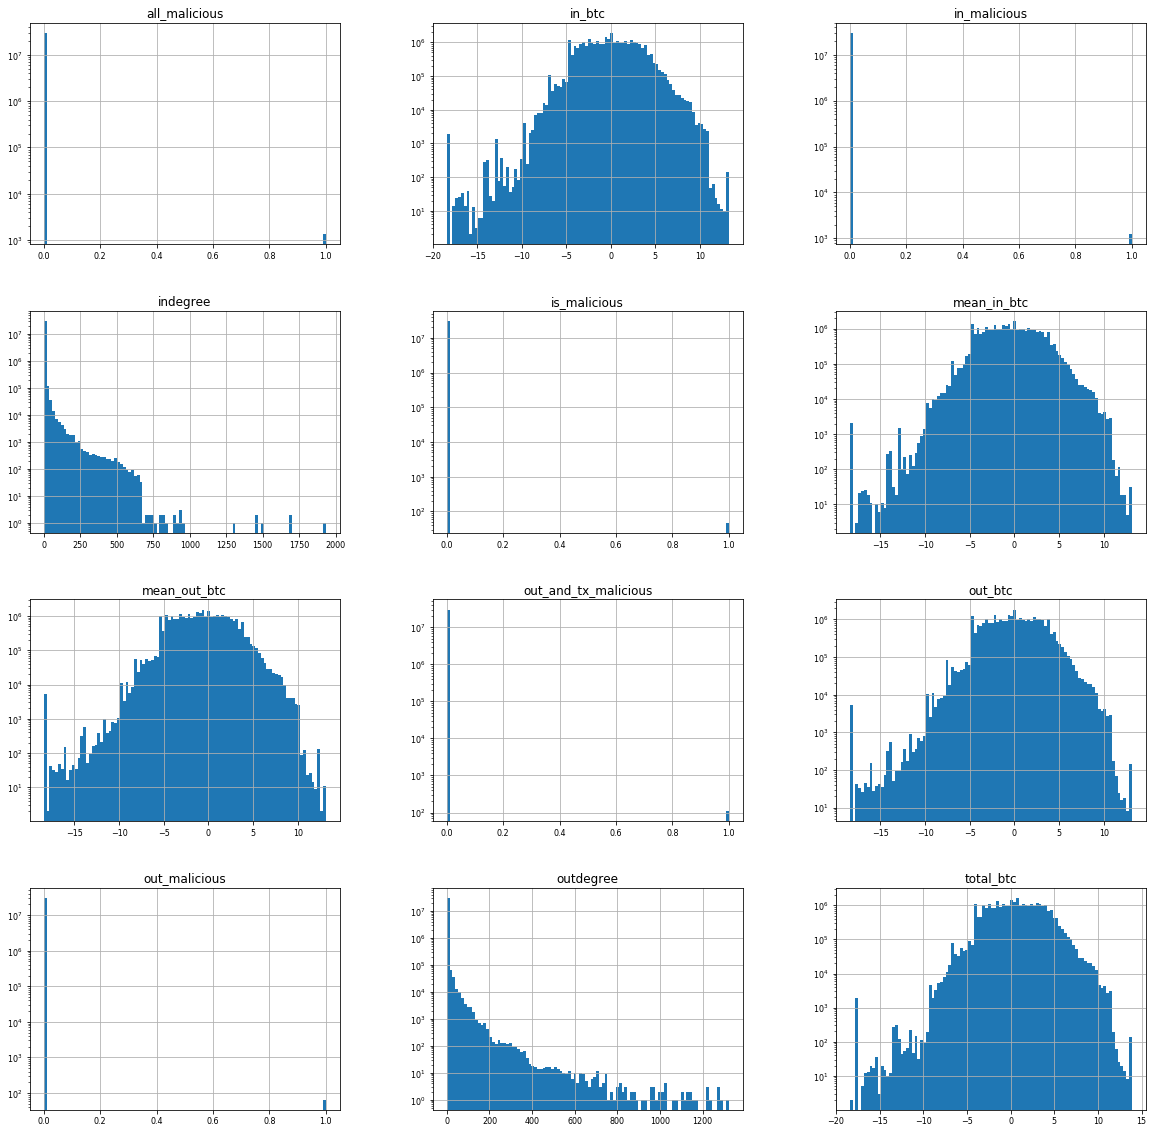

In [7]:
o_df.hist(figsize=(20, 20), bins=100, xlabelsize=8, ylabelsize=8, log=True);

# Logged data distributions

In [8]:
o_df2 = pd.DataFrame()
o_df2['indegree'] = df['indegree']
o_df2['outdegree'] = df['outdegree']
o_df2['in_btc'] =  np.log1p(df['in_btc'])
o_df2['out_btc']= np.log1p(df['out_btc'])
o_df2['total_btc']= np.log1p(df['total_btc'])
o_df2['mean_in_btc']= np.log1p(df['mean_in_btc'])
o_df2['mean_out_btc']= np.log1p(df['mean_out_btc'])
o_df2['tx_hash'] = df['tx_hash']
o_df2['in_malicious'] = df['in_malicious']
o_df2['out_malicious'] = df['out_malicious']
o_df2['is_malicious'] = df['is_malicious']
o_df2['out_and_tx_malicious'] = df['out_and_tx_malicious']
o_df2['all_malicious'] = df['all_malicious']

o_df2.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
count,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000
mean,2.149,2.149,1.334,1.352,1.726,1.174,1.055,0.000,0.000,0.000,0.000,0.000
std,7.421,4.512,1.579,1.587,1.800,1.518,1.386,0.006,0.001,0.001,0.002,0.007
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,2.000,0.095,0.095,0.187,0.062,0.049,0.000,0.000,0.000,0.000,0.000
50%,1.000,2.000,0.659,0.672,1.087,0.429,0.399,0.000,0.000,0.000,0.000,0.000
75%,2.000,2.000,2.261,2.309,2.965,1.889,1.708,0.000,0.000,0.000,0.000,0.000
max,1932.000,1322.000,13.218,13.122,13.864,13.121,13.122,1.000,1.000,1.000,1.000,1.000


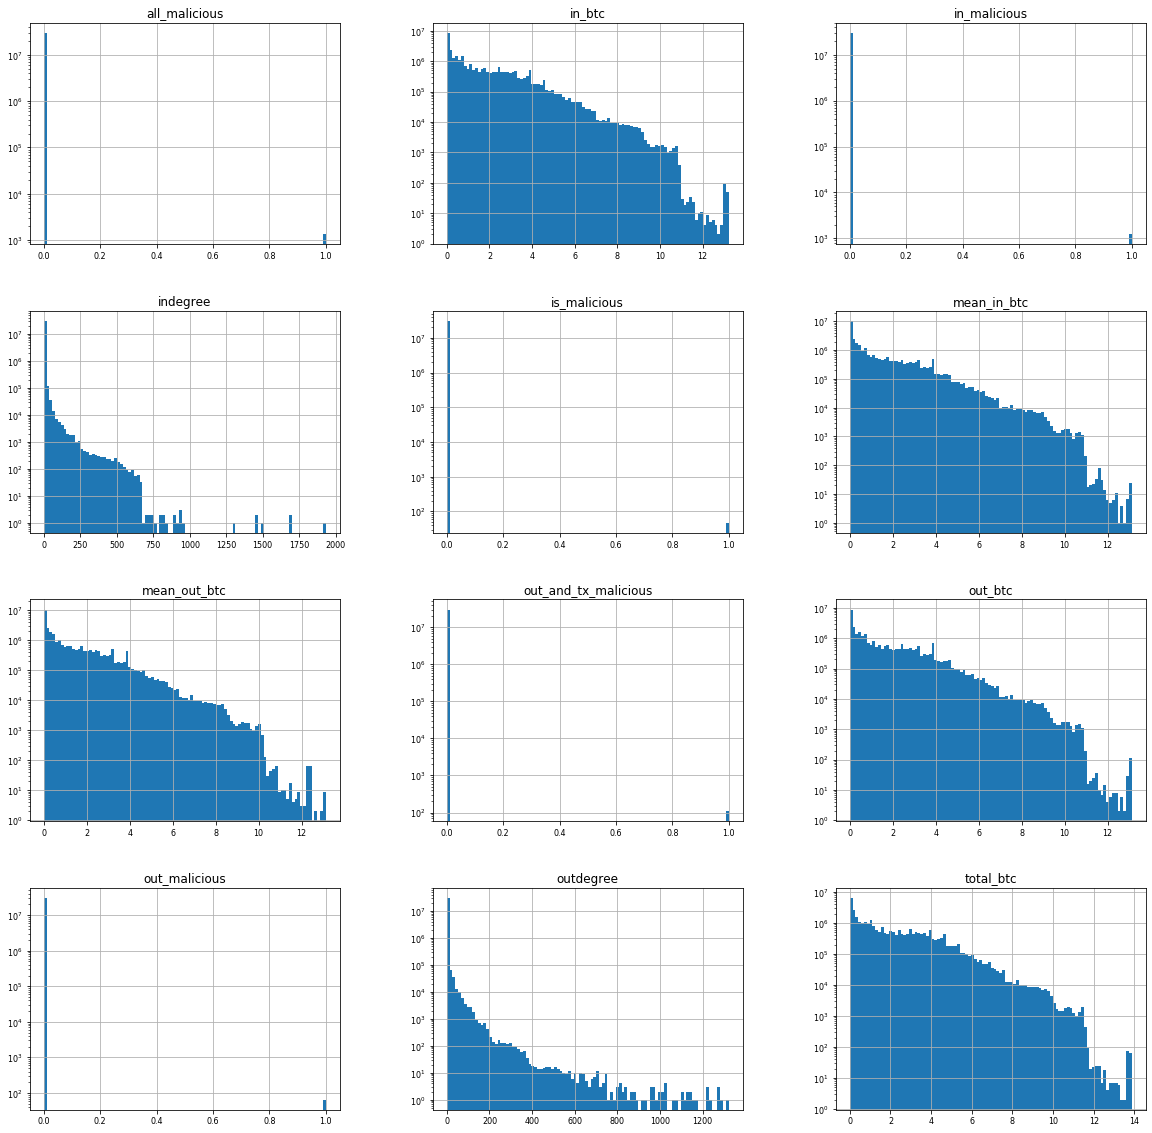

In [9]:
o_df2.hist(figsize=(20, 20), bins=100, xlabelsize=8, ylabelsize=8, log=True);

### Anomlous Log Data Distributions

# Outlier Removal

In [13]:
p_threshold = 3
n_threshold = -3
Z_scores = np.abs(stats.zscore(o_df.iloc[:,0:7]))

print('Total records: '+str(len(o_df)))
print('+ve Outliers: '+ str(len(np.where(Z_scores > p_threshold)[0])))
print('-ve Outliers: '+ str(len(np.where(Z_scores < n_threshold)[0])))
print('Outlier Percentage in Indegree: ' + str(round((len(np.where(Z_scores > p_threshold)[0])*100)/len(o_df),2)) + '%')
print('Shape before outlier removal: '+ str(o_df.shape))
log_df_ao = o_df[(Z_scores < p_threshold).all(axis=1)]
print('Shape after outlier removal: '+ str(log_df_ao.shape))

# Q1 = log_df_o_trim.quantile(0.25)
# Q3 = log_df_o_trim.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)
# print(log_df_o_trim.shape)
# log_df_ao = log_df_o_trim[~((log_df_o_trim < (Q1 - 1.5 * IQR)) |(log_df_o_trim > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(log_df_ao.shape)

Total records: 30248134
+ve Outliers: 692051
-ve Outliers: 0
Outlier Percentage in Indegree: 2.29%
Shape before outlier removal: (30248134, 13)
Shape after outlier removal: (29850349, 13)


          indegree    outdegree       in_btc      out_btc    total_btc  \
count 29850349.000 29850349.000 29850349.000 29850349.000 29850349.000   
mean         1.826        1.959       -0.053       -0.054        0.649   
std          1.924        0.765        2.775        2.820        2.803   
min          0.000        0.000       -8.517       -8.688       -7.903   
25%          1.000        2.000       -2.256       -2.290       -1.587   
50%          1.000        2.000       -0.015       -0.017        0.660   
75%          2.000        2.000        2.115        2.180        2.887   
max         24.000       15.000        8.461        8.618        9.194   

       mean_in_btc  mean_out_btc  in_malicious  out_malicious  is_malicious  \
count 29850349.000  29850349.000  29850349.000   29850349.000  29850349.000   
mean        -0.427        -0.683         0.000          0.000         0.000   
std          2.833         2.811         0.006          0.001         0.001   
min         -9.10

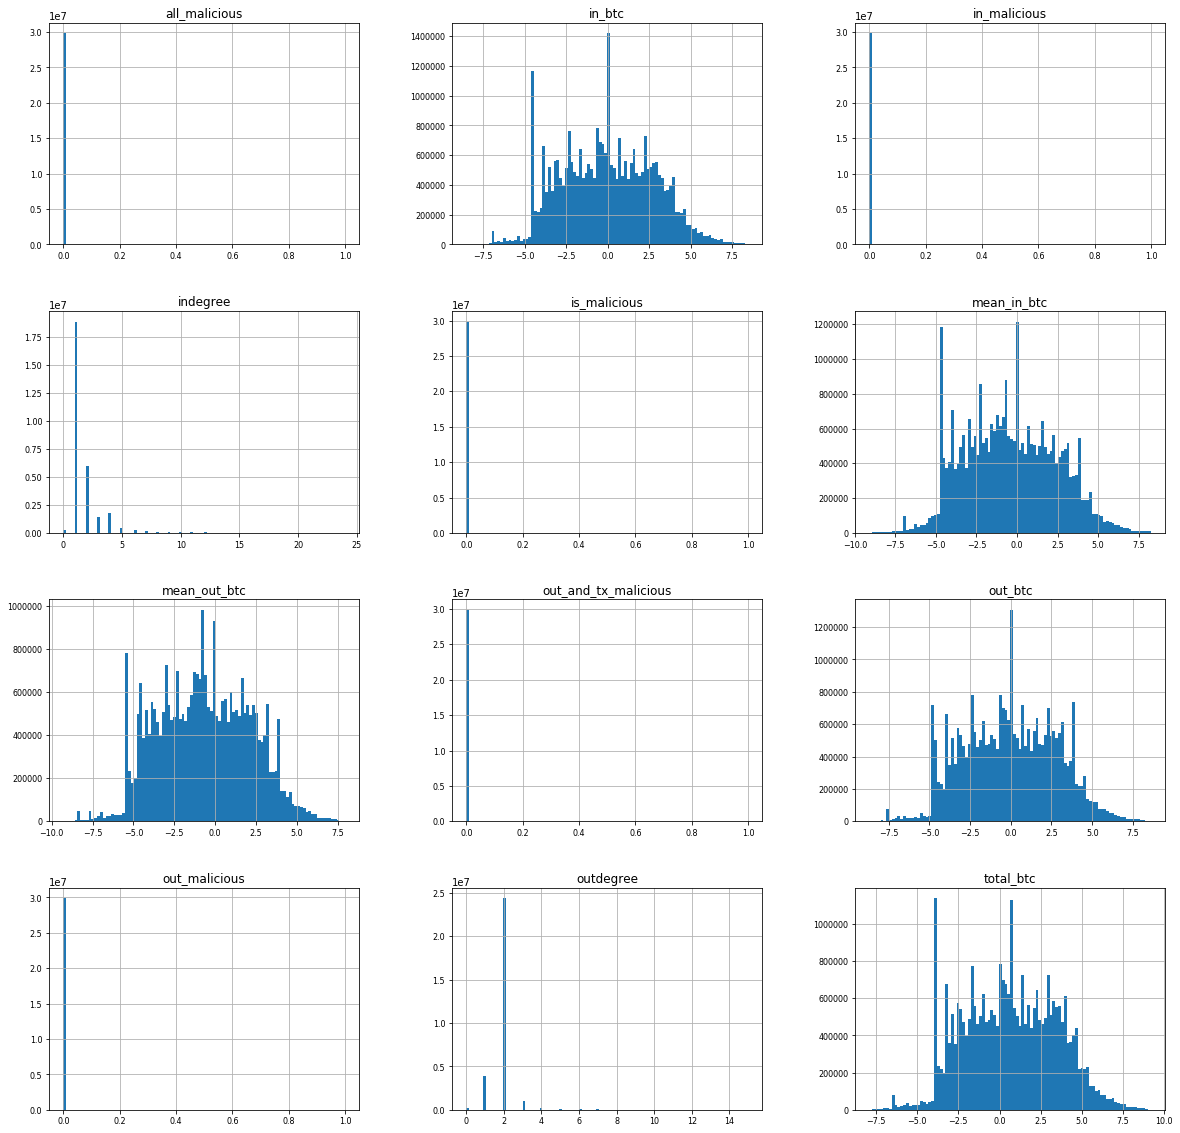

In [16]:
#log_df_ao = (np.log(log_df_ao)).replace(-np.inf, 0)
print(log_df_ao.describe())
log_df_ao.hist(figsize=(20, 20), bins=100, xlabelsize=8, ylabelsize=8, log=False);

In [17]:
log_df_ao.to_csv("./clean_btc_data.csv", index = False, sep=';', encoding='utf-8')